In [1]:
import numpy as np

In [2]:
x_train = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y_train = np.array([0, 0, 0, 1, 1, 1])
x_test = np.array([[-1, -2], [0, -1], [-3, -3], [2, 2],  [1, 2]])
y_test = np.array([0, 0, 0, 1, 1])

In [3]:
class NearestCentroidScratch():
  def __init__(self, metric='eucledian'):
    self.metric = metric
    self.centroids_ = np.array([])
    self.target_ = np.array([])
  
  def fit(self, X, y): 
    self.target_ = np.unique(y)  #cria um array com os possiveis rotulos
    self.centroids_  = np.empty([0,X.shape[1]]) #cria um array que receberá o centroide de cada rotulo
    
    for n in self.target_: #para cada rotulo calcula seu centroide e insere no array
        c1 = np.mean(X[y==n], axis=0)
        self.centroids_ = np.vstack((self.centroids_, c1))
        
  def predict(self, X): 
    n_samples, n_features = X.shape #numero de amostras e de caracteristicas a ser preditas
    self.predict_ = np.array([],dtype=int) #cria o array que sera retornado com os rotulos preditos
    
    for n in range(n_samples): #para cada tupla(elemento a ser predito) faz
        tupla = X[n,:]        
        hypotenuse = (tupla-self.centroids_[0,:])
        dist_min = np.sqrt(np.matmul(hypotenuse,np.transpose(hypotenuse)))#calcula a distancia para o primeiro rotulo
        label_min = self.target_[0] #chuta que o primeiro rotulo é da distancia mais proxima
        
        for m in range(1,len(self.target_),1): #calcula a distancia para todos os rotulos possiveis
            hypotenuse = (tupla-self.centroids_[m,:])
            dist_new = np.sqrt(np.matmul(hypotenuse,np.transpose(hypotenuse)))
            
            if (dist_new < dist_min): #cada vez que se encontra uma distancia menor atualiza o rotulo da distancia 
                label_min = self.target_[m]
                
        self.predict_ = np.hstack((self.predict_,label_min))#guarda o rotulo do elemento que foi classificado
    return self.predict_

In [4]:
clf = NearestCentroidScratch()
clf.fit(x_train, y_train)

clf.centroids_

array([[-2.        , -1.33333333],
       [ 2.        ,  1.33333333]])

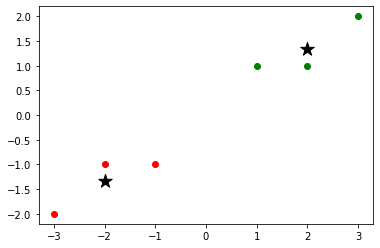

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], c='r')
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], c='g')

plt.scatter(clf.centroids_[:,0], clf.centroids_[:,1], s=200, marker='*', c='k')

In [6]:
y_pred = clf.predict(x_test)
print(y_pred)
print(y_test)

[0 0 0 1 1]
[0 0 0 1 1]


In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred) * 100

100.0